* Arkadiusz Nowacki (ID:220055077)

# Introduction

The study below will delve into experimental measurements for the Data Distribution Service, aiming to clear, analyze,   

compare, and evaluate data. Furthermore, these tasks were carried out under two conditions, with security enabled and 

disabled, to further elaborate on the research.

# Research objectives and motivation

The primary motivation for this study is to generate novel information that can serve as a foundation for further research 

on the subject and provide benefits to project beneficiaries. The project objective that are to be satisified are as 

follows:
* To produce experimental measurements for the Data Distribution Services of choice that are analysable, evaluable and subjected to comparison while encapsulated in a report at the end of the project.

* Desirably use the benchmark application on Data Distribution Services while their additional security configuration is enabled to expand the findings

## Beneficiaries

The beneficiaries that are going to benefit from the informations of the study about the DDS performance metrics are:
* Research teams within the DDS companies, seeking ways to enhance their DDS solution and become the best solution available in the market, stand to gain financially.

* Tech industries, including Internet of Things (IoT) businesses, that seek to choose the best DDS solution capable of minimizing latency compared to other solutions in the market will distinguish themselves by providing products with the shortest response time. This enhancement will effectively strengthen their customer relations.

* Programmers who aim to make informed choices to enhance metrics in their data-centric applications. 

* Researchers interested in the performance of publish-subscribe real-time distributed systems.


# Data used for the study

The data employed in this study was generated by the researcher of the project titled 

"Experimental Performance Evaluation of Data-Distribution Service Software" during the project's 

"Data Collection for Testing Campaign" phase. To generate this data, RTI's network performance 

testing software, known as "Perftest 4.1," was utilized. The data is contained within a single 

".xlsx" file, where the tests are differentiated by numbers and indicators labeled with the 

alphabetic letters "A" and "B". The initial letter denotes the Publisher, while the latter 

signifies the Subscriber. This data encompasses both throughput and latency tests, along with 

additional configuration details for each test entity and the overall machine specifications. 

Both metrics are presented in a tabular format, similar to the original output from the command-

line interface. Statistical values encompass sample size, averages, minimum and maximum values, 

as well as percentile values.

# Settings

## Configuration of the testing machine

The machine used for testing has a specification that can be listed as:
* Operating system: Windows 10 Home
* Processor: Intel® Core™ I5-8300H CPU @ 2.30GHz, 2304 MHz, 4 Core(s), 8 Logical Processor(s)
* Installed Physical Memory (RAM): 16GB
* System model: Nitro AN515-52
* System type: x64-based PC

## Configuration of the networking machine

Networking machine is:
* Router with specification of Hub 3.0 and type VMDG505/TG2492LG-VM

## Configuration of the Perftest

The configuration needed to conduct a similar testing campaign must align with the information 
presented below:
* Perftest version: RTI Perftest 4.1
* Connext DDS installation: rti_connext_dds-6.1.1 installation
* Number of publishers & subscribers in the test: 1 of each
* Time delay between execution: 30 seconds
* RTI's perftest architecture: set RTI_PERFTEST_ARCH=i86Win64VS2022
* Compilation with RTI Code Generator (rtiddsgen): .\build.bat --platform x64Win64VS2022 --java-build --dynamic --debug

## Configuration of the paramaters for the publishing side, throughput (in order)

The use of paramaters to perform the throughput test on the Publisher is:
*  perftest_java -pub
* -noPrint
* -domain 337 (can be any number but must match with subscriber)
* -latencyCount 100000
* -scan 32:64:128:256:512:1024:2048:4096:8192:16384:32768:40000
* -exec 30

## Configuration of the paramaters for the subscribing side, throughput (in order)

The use of paramaters to perform the throughput test on the Subscriber is:
*  perftest_java -sub
* -noPrint
* -domain 337

## Configuration of the paramaters for the publishing side, latency (in order)

The use of paramaters to perform the latency test on the Publisher is:
* perftest_java -pub
* -noPrint
* -domain 337 (can be any number but must match with subscriber)
* -latencyTest
* -latencyCount 100000
* -scan 32:64:128:256:512:1024:2048:4096:8192:16384:32768:40000
* -exec 30
    

## Configuration of the paramaters for the subscribing side, latency (in order)

The use of paramaters to perform the latency test on the Subscriber is:
* perftest_java -sub
* -noPrint
* -domain 337

# Reasons for paramaters

The parameters associated with the testing were thoughtfully selected, guided by the information gathered from the literature review and the recommendations provided in the third, fourth, and fifth sections of the following document:
* https://community.rti.com/static/documentation/perftest/current/index.html

However, for a comprehensive explanation of why each parameter choice was made, you can refer to the detailed list provided below:
* --java-build - the decision to utilize this particular programming language was closely tied to the necessity of developing a plugin for another DDS solution. It was essential for the language to align with the plugin's programming language for consistency.

* --dynamic - the dynamic libraries were intended for future security-related actions and were recommended by the advisor.

* --debug - the debug libraries would allow debug mode, which has supported in resolving of minor issues. 

* perftest_java -pub / perftest_java -sub - necessary to create two entities that will collaborate in order to provide the testing results. An already create .jar file was executed one compliation phase was concluded. 

* -noPrint - during the latency test, "noPrint" is employed to counteract frequent printing of latency samples. Additionally, printing operations incur higher costs, which could potentially impact the final results. This scenario is not favorable for the tests. 

* -domain 337 - it is used to ensure that the Publisher or Subscriber is interacting with the correct counterpart rather than an outdated entity that may have been in a waiting state. This also enhances the clarity of the test and expedites the configuration analysis process.

* -latencyCount 100000 - this determines the number of samples to send before the latency ping packet is sent. It is left on default value it helps measure and asses the latency. 

* -scan 32:64:128... - scan allows running the test in a scan mode where a list of sizes is allowed. The rationale behind conducting the scan with a list of sizes was selected to illustrate the behavior of the metrics at specific byte sample size values. In one aspect, this approach narrows down the range of values, while on the other, it effectively showcases the phenomena and encompasses both small and large values for comprehensive analysis.narrows the values but on the other it displays the phenomena and includes both small and large values for analysis. 

* -exec 30 - establishes a delay between each test in both the Publisher and Subscriber to ensure that no additional overhead occurs during testing, safeguarding the integrity of the testing and network machinery. Otherwise, it could potentially have a detrimental impact on the collected metrics. 

* -latencyTest - changes the mode of the test from "Throughput" to "Latency".


# Analysis

In [83]:
#PRE CONFIG
#IMPORTS
#DISABLE WARNINGS
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
#VARIABLES
default = None
style = 's-'
mSize = 9 
col = 'deepskyblue'
col2 = 'red'
title_size = 18
label_size = 16

In [84]:
#FUNCTIONS
def openFile(io, sheet_name, header, names,
             index_col, usecols, squeeze,
             dtype, engine, converters,
             true_values, false_values, skiprows,
             nrows):
    return pd.read_excel(io, sheet_name, header, names,
                         index_col, usecols, squeeze,
                         dtype, engine, converters,
                         true_values, false_values, skiprows,
                         nrows)

## Measurements from Test 1A: Latency (Publisher) (Throughput Mode)

In [85]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df1 = openFile('./Tests.xlsx',
              sheet_name = '1a',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df1.columns = ['sample_size_bytes', 'avg_us', 'std_us', 'min_us', 'max_us']

#SET INDEX
df1.index.name = 'id'

In [219]:
#ALL OF THE VALUES INCLUDED
x0 = df1['sample_size_bytes'].to_numpy()
y0 = df1['avg_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x1 = np.delete(x0,[10,11])
y1 = np.delete(y0,[0,1])

#REMOVE NaN VALUES
x1 = x1[np.isfinite(x1)]
y1 = y1[np.isfinite(y1)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

array([7144., 3549., 1807.,  986.,  562.,  361.,  258.,  175.,   53.,
         49.,  106.,  131.,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan])

In [87]:
#ALL OF THE VALUES INCLUDED
x2 = df1['sample_size_bytes'].to_numpy()
y2 = df1['std_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x3 = np.delete(x2,[10,11])
y3 = np.delete(y2,[0,1])

#REMOVE NaN VALUES
x3 = x3[np.isfinite(x3)]
y3 = y3[np.isfinite(y3)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [88]:
#ALL OF THE VALUES INCLUDED
x4 = df1['sample_size_bytes'].to_numpy()
y4 = df1['min_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x5 = np.delete(x4,[10,11])
y5 = np.delete(y4,[0,1])

#REMOVE NaN VALUES
x5 = x5[np.isfinite(x5)]
y5 = y5[np.isfinite(y5)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [89]:
#ALL OF THE VALUES INCLUDED
x6 = df1['sample_size_bytes'].to_numpy()
y6 = df1['max_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x7 = np.delete(x6,[10,11])
y7 = np.delete(y6,[0,1])

#REMOVE NaN VALUES
x7 = x7[np.isfinite(x7)]
y7 = y7[np.isfinite(y7)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

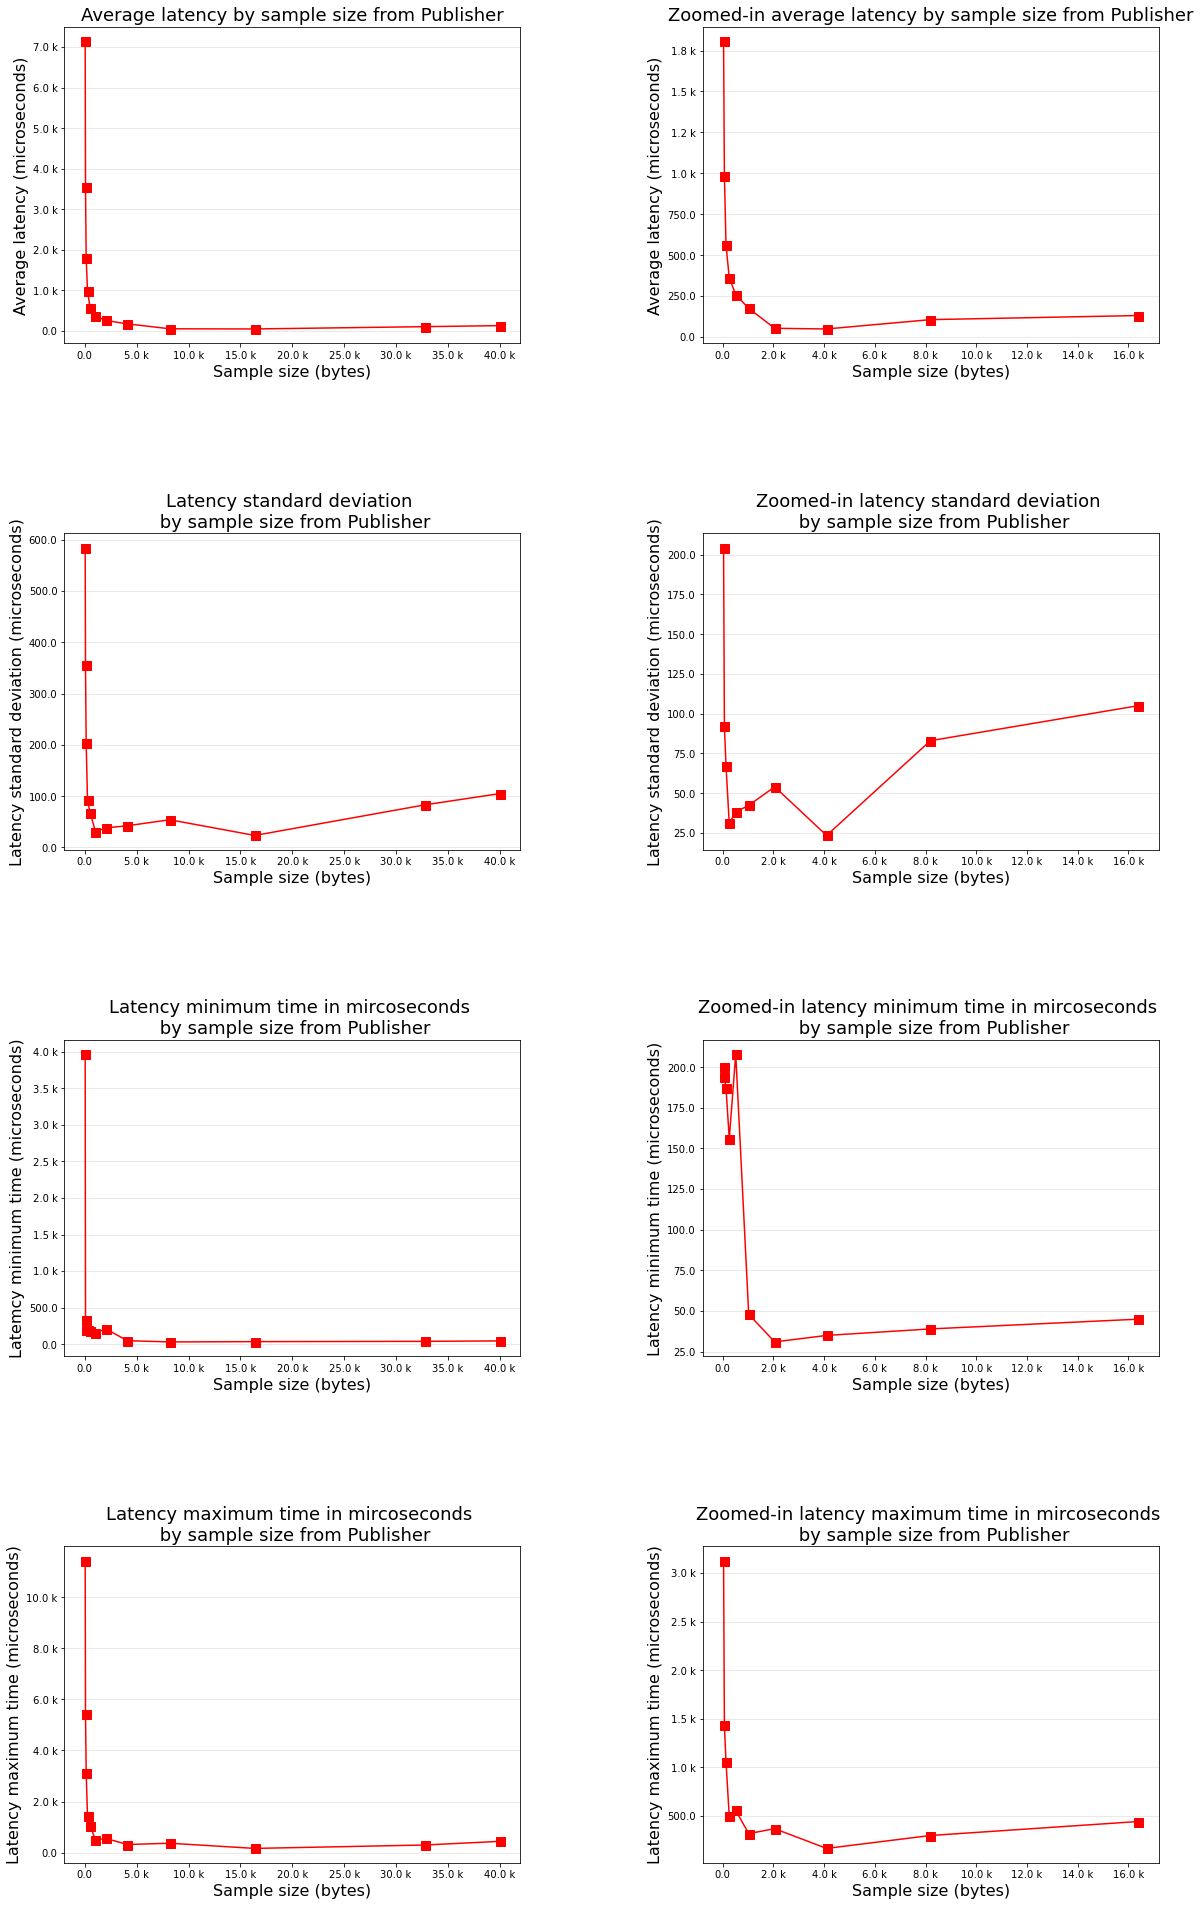

In [90]:
fix, axes = plt.subplots(4, 2, figsize = (19,15))

axes[0,0].plot(x0, y0, style, ms = mSize, color = col2)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Average latency by sample size from Publisher', fontsize = title_size)
axes[0,0].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x1, y1, style, ms = mSize, color = col2)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in average latency by sample size from Publisher', fontsize = title_size)
axes[0,1].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x2, y2, style, ms = mSize, color = col2)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,0].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x3, y3, style, ms = mSize, color = col2)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,1].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x4, y4, style, ms = mSize, color = col2)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,0].set_ylabel('Latemcy minimum time (microseconds)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x5, y5, style, ms = mSize, color = col2)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,1].set_ylabel('Latency minimum time (microseconds)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,0].plot(x6, y6, style, ms = mSize, color = col2)
axes[3,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,0].set_title('Latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,0].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,1].plot(x7, y7, style, ms = mSize, color = col2)
axes[3,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,1].set_title('Zoomed-in latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,1].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.8, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [91]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df1.head(12)

,sample_size_bytes,avg_us,std_us,min_us,max_us
id,,,,,
0,32.0,7144.0,584.7,3967.0,11436.0
1,64.0,3549.0,355.3,334.0,5431.0
2,128.0,1807.0,204.4,200.0,3128.0
3,256.0,986.0,92.5,194.0,1430.0
4,512.0,562.0,67.2,187.0,1054.0
5,1024.0,361.0,31.0,156.0,493.0
6,2048.0,258.0,38.2,208.0,554.0
7,4096.0,175.0,42.3,48.0,316.0
8,8192.0,53.0,54.0,31.0,366.0


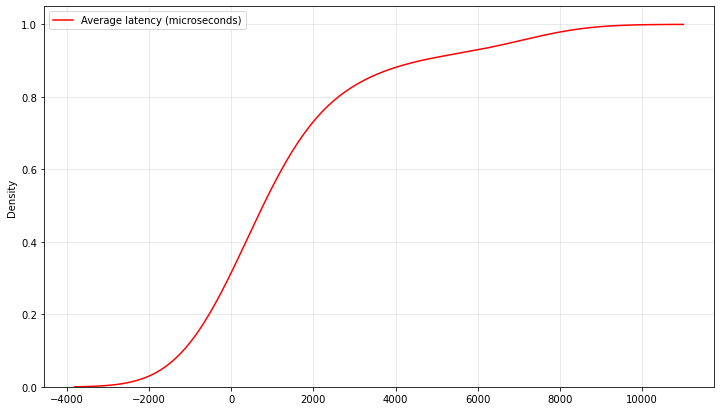

In [303]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y0, cumulative = True, label = "Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

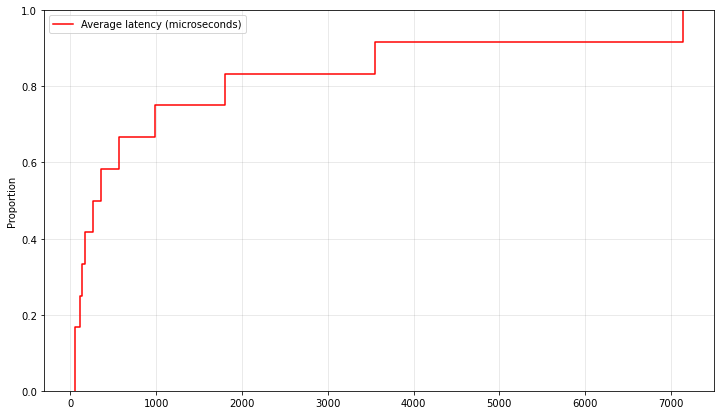

In [304]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y0, label="Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 1B: Througput (Subscriber) (Throughput Mode)

In [11]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df2 = openFile('./Tests.xlsx',
              sheet_name = '1b',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df2.columns = ['sample_size_bytes', 'total_samples', 'avg_samples_perSec', 'avg_mbps', 'lost_samples']

#SET INDEX
df2.index.name = 'id'

In [12]:
#ALL OF THE VALUES INCLUDED
x8 = df2['sample_size_bytes'].to_numpy()
y8 = df2['total_samples'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x9 = np.delete(x8,[8,9,10,11])
y9 = np.delete(y8,[0,1,2,3])

#REMOVE NaN VALUES
x9 = x9[np.isfinite(x9)]
y9 = y9[np.isfinite(y9)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [13]:
#ALL OF THE VALUES INCLUDED
x10 = df2['sample_size_bytes'].to_numpy()
y10 = df2['avg_samples_perSec'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x11 = np.delete(x10,[9,10,11])
y11 = np.delete(y10,[0,1,2])

#REMOVE NaN VALUES
x11 = x11[np.isfinite(x11)]
y11 = y11[np.isfinite(y11)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [14]:
#ALL OF THE VALUES INCLUDED
x12 = df2['sample_size_bytes'].to_numpy()
y12 = df2['avg_mbps'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x13 = np.delete(x12,[9,10,11])
y13 = np.delete(y12,[9,10,11])

#REMOVE NaN VALUES
x13 = x13[np.isfinite(x13)]
y13 = y13[np.isfinite(y13)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

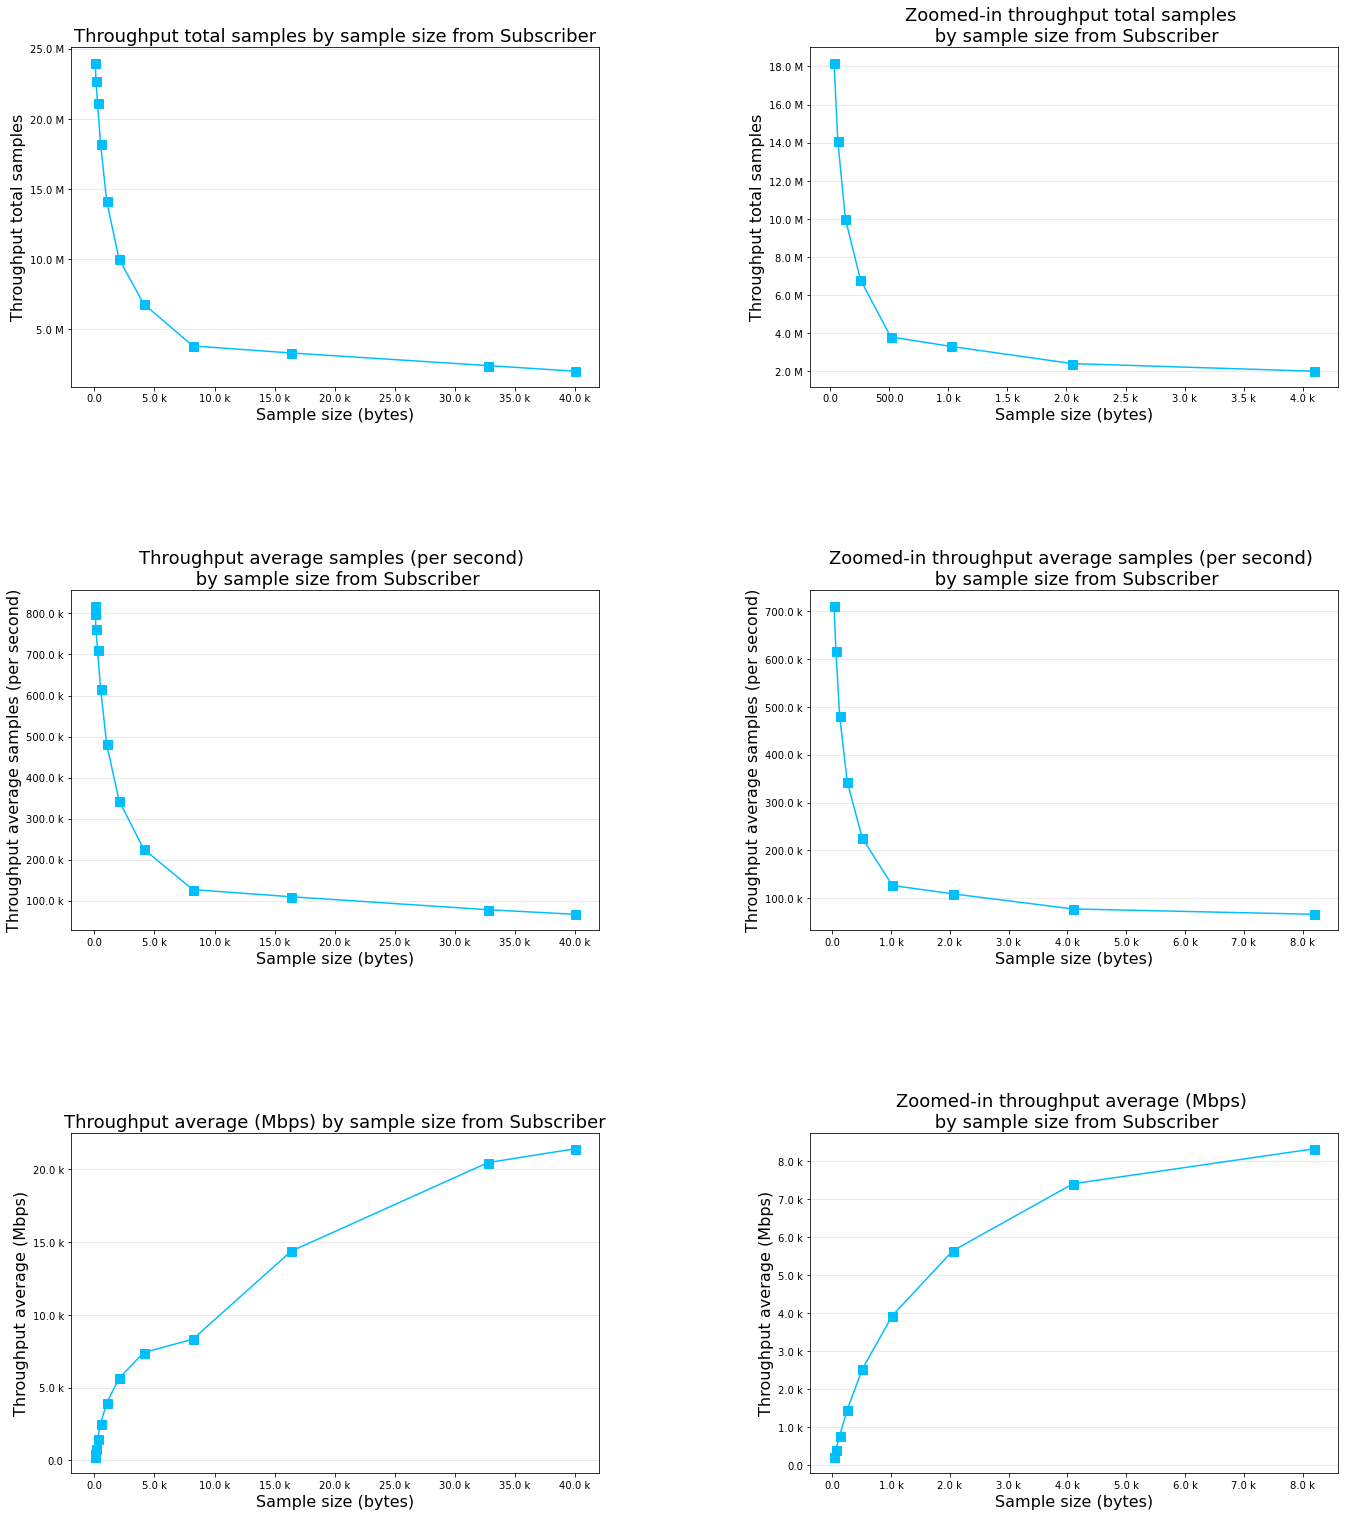

In [15]:
fix, axes = plt.subplots(3, 2, figsize = (22,11))

axes[0,0].plot(x8, y8, style, ms = mSize, color = col)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Throughput total samples by sample size from Subscriber', fontsize = title_size)
axes[0,0].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)  
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x9, y9, style, ms = mSize, color = col)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in throughput total samples \n by sample size from Subscriber', fontsize = title_size)
axes[0,1].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[1,0].plot(x10, y10, style, ms = mSize, color = col)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,0].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[1,1].plot(x11, y11, style, ms = mSize, color = col)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,1].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x12, y12, style, ms = mSize, color = col)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Throughput average (Mbps) by sample size from Subscriber', fontsize = title_size)
axes[2,0].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[2,1].plot(x13, y13, style, ms = mSize, color = col)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in throughput average (Mbps) \n by sample size from Subscriber', fontsize = title_size)
axes[2,1].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [16]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df2.head(12)

,sample_size_bytes,total_samples,avg_samples_perSec,avg_mbps,lost_samples
id,,,,,
0,32.0,24000000.0,818840.0,209.6,0.0
1,64.0,24000000.0,799739.0,409.5,0.0
2,128.0,22700000.0,762502.0,780.8,0.0
3,256.0,21100000.0,710860.0,1455.8,0.0
4,512.0,18200000.0,616581.0,2525.5,0.0
5,1024.0,14100000.0,480668.0,3937.6,0.0
6,2048.0,10000000.0,343915.0,5634.7,0.0
7,4096.0,6800000.0,225869.0,7401.3,0.0
8,8192.0,3800000.0,126944.0,8319.4,0.0


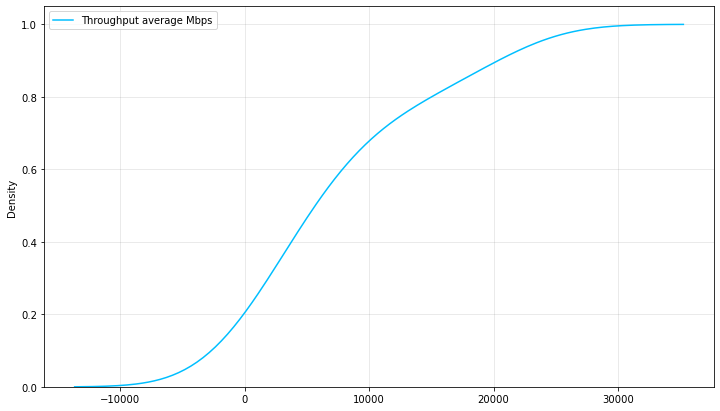

In [306]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y12, cumulative = True, label = "Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

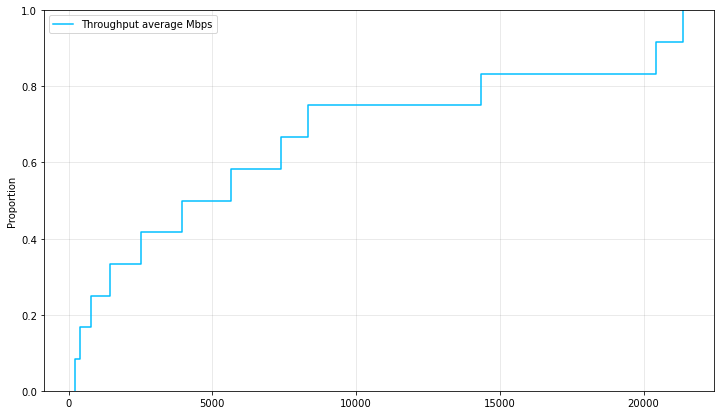

In [307]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y12, label="Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 2A: Latency (Publisher) (Latency Mode)

In [17]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df3 = openFile('./Tests.xlsx',
              sheet_name = '2a',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df3.columns = ['sample_size_bytes', 'avg_us', 'std_us', 'min_us', 'max_us']

#SET INDEX
df3.index.name = 'id'

In [18]:
#ALL OF THE VALUES INCLUDED
x14 = df3['sample_size_bytes'].to_numpy()
y14 = df3['avg_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x15 = np.delete(x14,[11])
y15 = np.delete(y14,[8])

#REMOVE NaN VALUES
x15 = x15[np.isfinite(x15)]
y15 = y15[np.isfinite(y15)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [19]:
#ALL OF THE VALUES INCLUDED
x16 = df3['sample_size_bytes'].to_numpy()
y16 = df3['std_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x17 = np.delete(x16,[10,11])
y17 = np.delete(y16,[0,1])

#REMOVE NaN VALUES
x17 = x17[np.isfinite(x17)]
y17 = y17[np.isfinite(y17)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [20]:
#ALL OF THE VALUES INCLUDED
x18 = df3['sample_size_bytes'].to_numpy()
y18 = df3['min_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x19 = np.delete(x18,[10,11])
y19 = np.delete(y18,[0,8])

#REMOVE NaN VALUES
x19 = x19[np.isfinite(x19)]
y19 = y19[np.isfinite(y19)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [21]:
#ALL OF THE VALUES INCLUDED
x20 = df3['sample_size_bytes'].to_numpy()
y20 = df3['max_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x21 = np.delete(x20,[10,11])
y21 = np.delete(y20,[0,8])

#REMOVE NaN VALUES
x21 = x21[np.isfinite(x21)]
y21 = y21[np.isfinite(y21)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

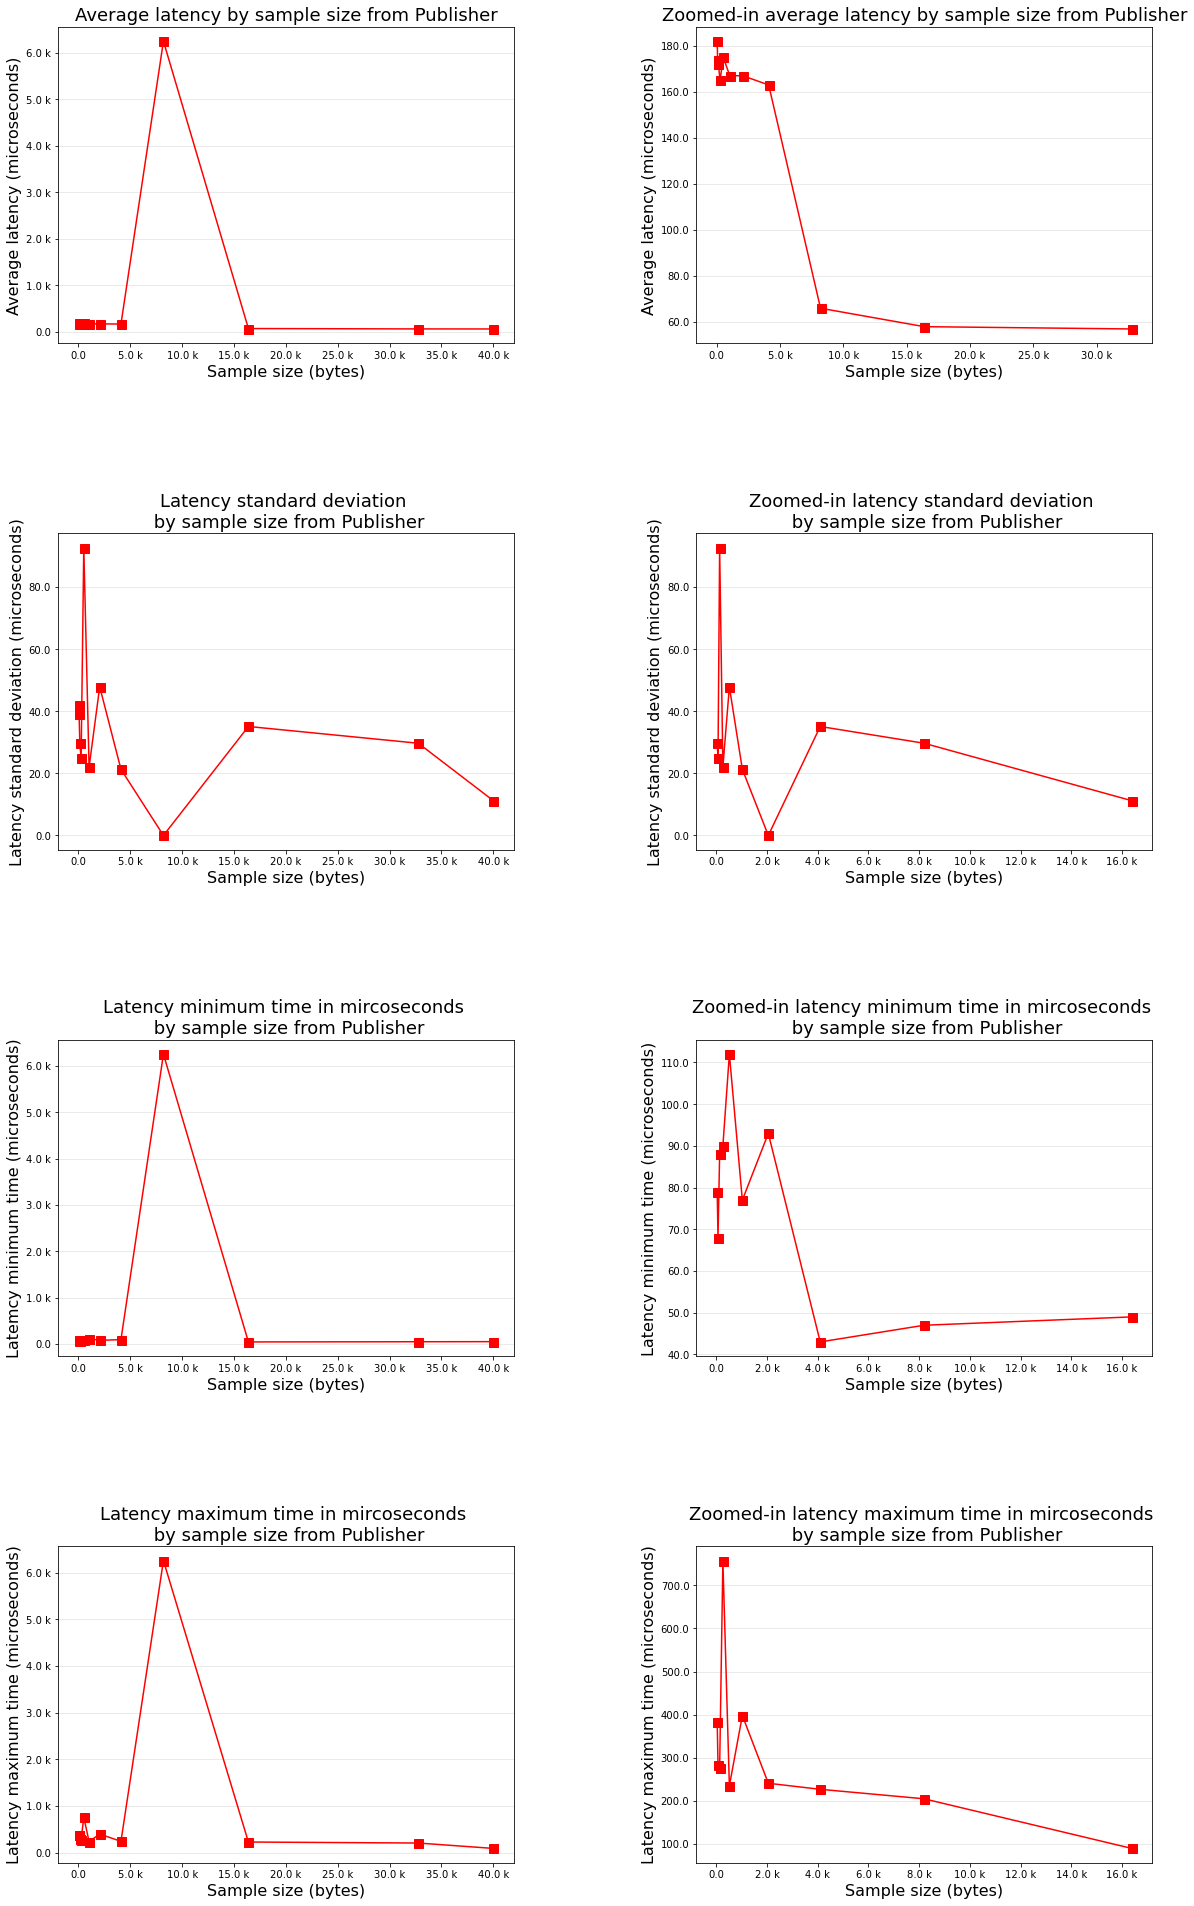

In [22]:
fix, axes = plt.subplots(4, 2, figsize = (19,15))

axes[0,0].plot(x14, y14, style, ms = mSize, color = col2)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Average latency by sample size from Publisher', fontsize = title_size)
axes[0,0].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x15, y15, style, ms = mSize, color = col2)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in average latency by sample size from Publisher', fontsize = title_size)
axes[0,1].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x16, y16, style, ms = mSize, color = col2)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,0].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)  
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x17, y17, style, ms = mSize, color = col2)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,1].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x18, y18, style, ms = mSize, color = col2)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,0].set_ylabel('Latemcy minimum time (microseconds)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x19, y19, style, ms = mSize, color = col2)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,1].set_ylabel('Latency minimum time (microseconds)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,0].plot(x20, y20, style, ms = mSize, color = col2)
axes[3,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,0].set_title('Latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,0].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[3,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,1].plot(x21, y21, style, ms = mSize, color = col2)
axes[3,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,1].set_title('Zoomed-in latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,1].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.8, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [23]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df3.head(12)

,sample_size_bytes,avg_us,std_us,min_us,max_us
id,,,,,
0,32.0,182.0,42.1,72.0,375.0
1,64.0,174.0,39.0,79.0,383.0
2,128.0,172.0,29.7,68.0,283.0
3,256.0,165.0,25.0,88.0,276.0
4,512.0,175.0,92.7,90.0,757.0
5,1024.0,167.0,22.0,112.0,235.0
6,2048.0,167.0,47.9,77.0,398.0
7,4096.0,163.0,21.3,93.0,241.0
8,8192.0,6256.0,0.0,6256.0,6256.0


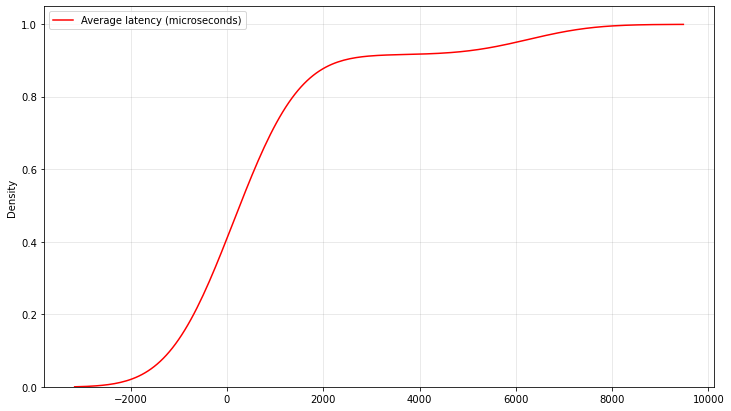

In [308]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y14, cumulative = True, label = "Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

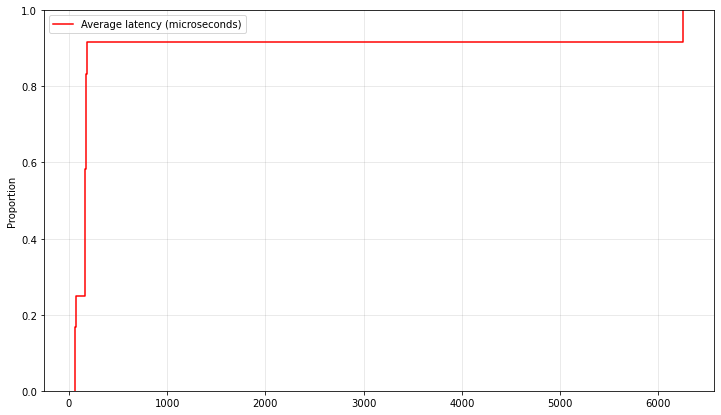

In [319]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y14, label="Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 2B: Throughput (Subscriber) (Latency Mode)

In [24]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df4 = openFile('./Tests.xlsx',
              sheet_name = '2b',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df4.columns = ['sample_size_bytes', 'total_samples', 'avg_samples_perSec', 'avg_mbps', 'lost_samples']

#SET INDEX
df4.index.name = 'id'

In [25]:
#ALL OF THE VALUES INCLUDED
x22 = df4['sample_size_bytes'].to_numpy()
y22 = df4['total_samples'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x23 = np.delete(x22,[11])
y23 = np.delete(y8,[0])

#REMOVE NaN VALUES
x23 = x23[np.isfinite(x23)]
y23 = y23[np.isfinite(y23)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [26]:
#ALL OF THE VALUES INCLUDED
x24 = df4['sample_size_bytes'].to_numpy()
y24 = df4['avg_samples_perSec'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x25 = np.delete(x24,[10,11])
y25 = np.delete(y24,[0,1])

#REMOVE NaN VALUES
x25 = x25[np.isfinite(x25)]
y25 = y25[np.isfinite(y25)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [27]:
#ALL OF THE VALUES INCLUDED
x26 = df4['sample_size_bytes'].to_numpy()
y26 = df4['avg_mbps'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x27 = np.delete(x26,[10,11])
y27 = np.delete(y26,[10,11])

#REMOVE NaN VALUES
x27 = x27[np.isfinite(x27)]
y27 = y27[np.isfinite(y27)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

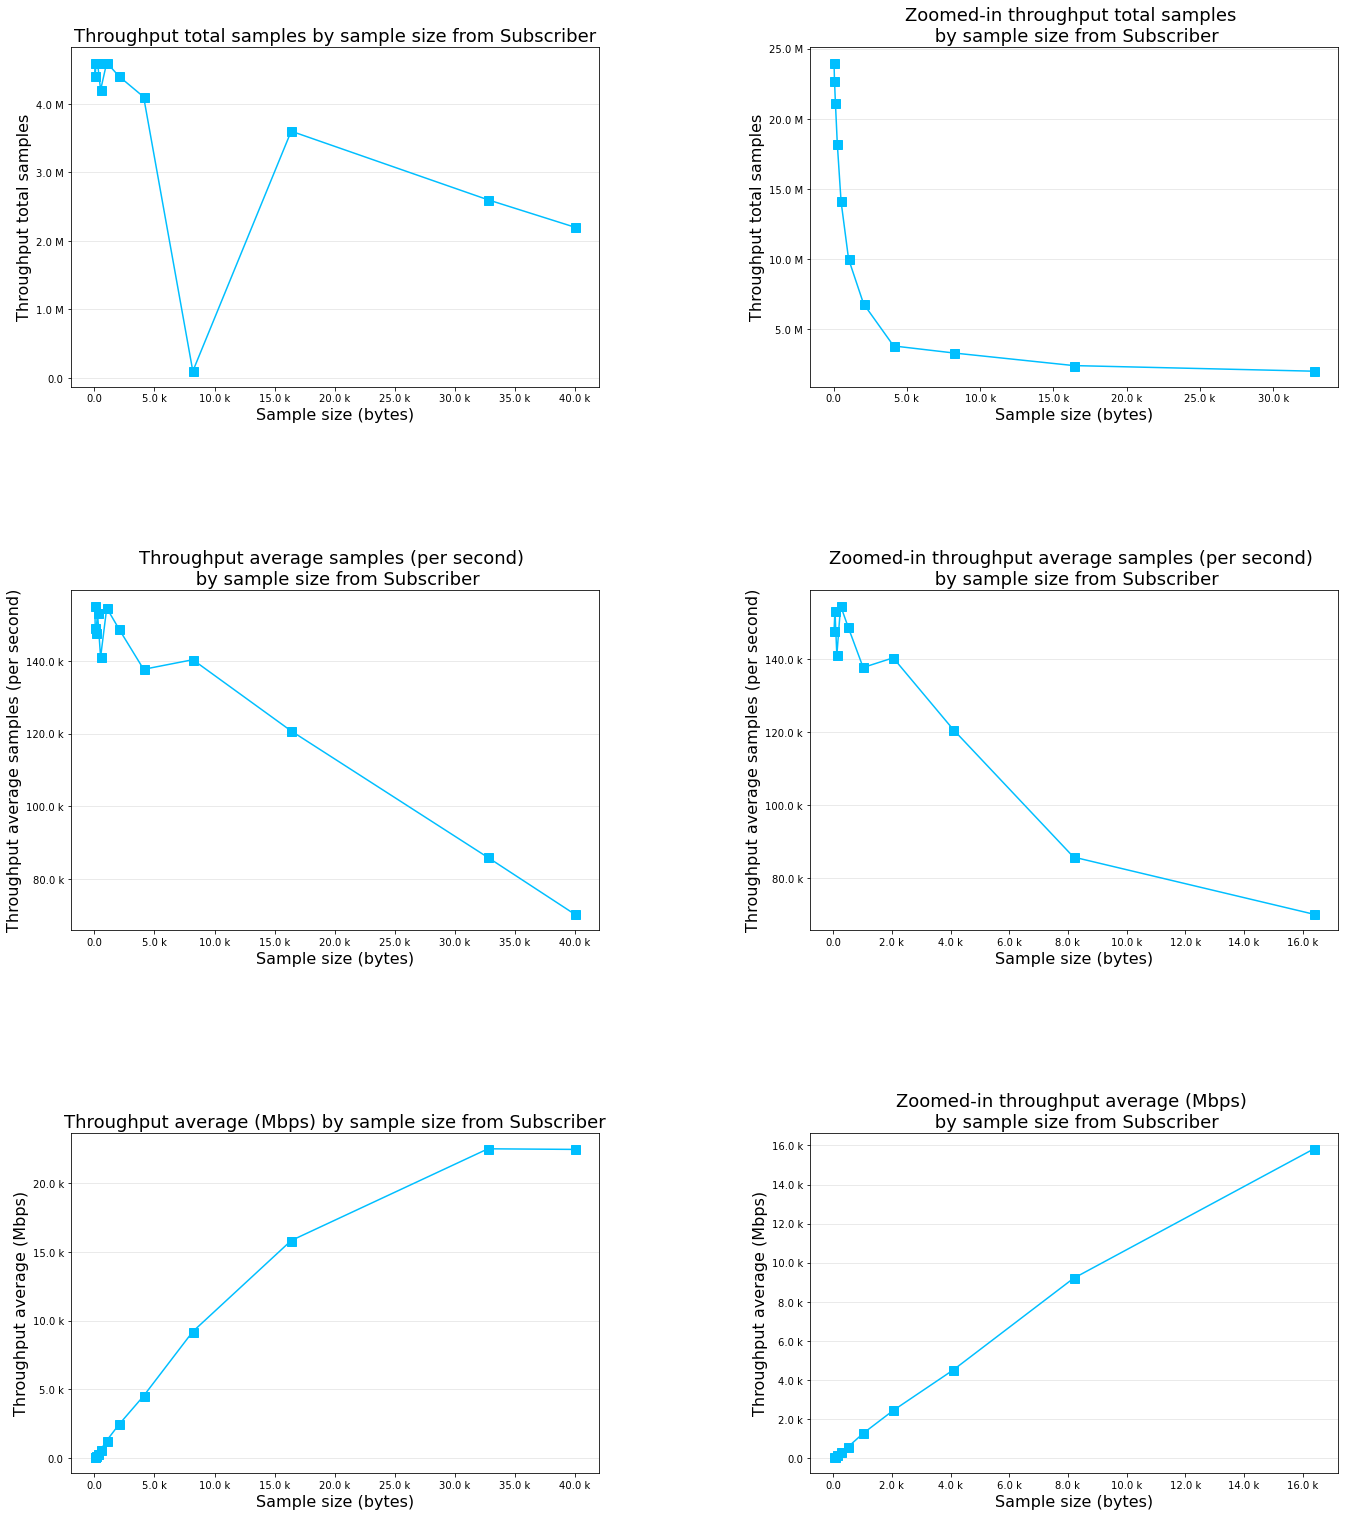

In [28]:
fix, axes = plt.subplots(3, 2, figsize = (22,11))

axes[0,0].plot(x22, y22, style, ms = mSize, color = col)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Throughput total samples by sample size from Subscriber', fontsize = title_size)
axes[0,0].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x23, y23, style, ms = mSize, color = col)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in throughput total samples \n by sample size from Subscriber', fontsize = title_size)
axes[0,1].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x24, y24, style, ms = mSize, color = col)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,0].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x25, y25, style, ms = mSize, color = col)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,1].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x26, y26, style, ms = mSize, color = col)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Throughput average (Mbps) by sample size from Subscriber', fontsize = title_size)
axes[2,0].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x27, y27, style, ms = mSize, color = col)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in throughput average (Mbps) \n by sample size from Subscriber', fontsize = title_size)
axes[2,1].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [29]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df4.head(12)

,sample_size_bytes,total_samples,avg_samples_perSec,avg_mbps,lost_samples
id,,,,,
0,32.0,4600000.0,155295.0,39.8,0.0
1,64.0,4400000.0,149119.0,76.3,0.0
2,128.0,4600000.0,147742.0,151.3,0.0
3,256.0,4600000.0,153340.0,314.0,0.0
4,512.0,4200000.0,141067.0,577.8,0.0
5,1024.0,4600000.0,154670.0,1267.1,0.0
6,2048.0,4400000.0,148844.0,2438.7,0.0
7,4096.0,4100000.0,137756.0,4514.0,0.0
8,8192.0,100000.0,140401.0,9201.3,0.0


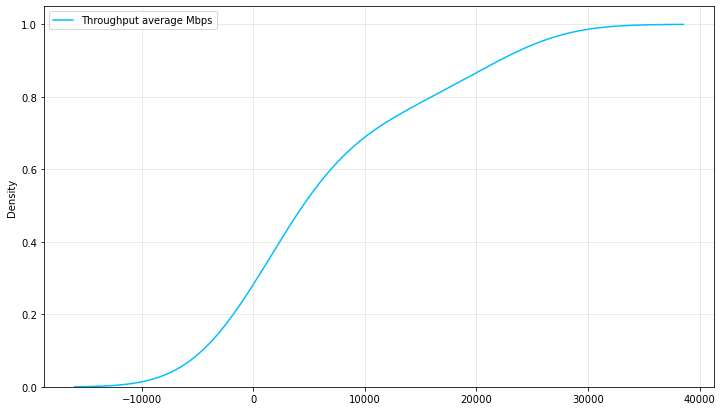

In [310]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y26, cumulative = True, label = "Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

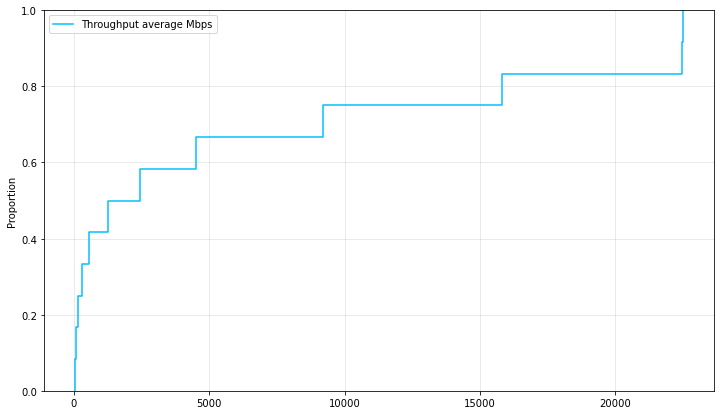

In [311]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y26, label="Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 3A: Latency (Publisher) (Throughput Mode)

In [30]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df5 = openFile('./Tests.xlsx',
              sheet_name = '3a',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df5.columns = ['sample_size_bytes', 'avg_us', 'std_us', 'min_us', 'max_us']

#SET INDEX
df5.index.name = 'id'

In [31]:
#ALL OF THE VALUES INCLUDED
x28 = df5['sample_size_bytes'].to_numpy()
y28 = df5['avg_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x29 = np.delete(x28,[10,11])
y29 = np.delete(y28,[0,1])

#REMOVE NaN VALUES
x29 = x29[np.isfinite(x29)]
y29 = y29[np.isfinite(y29)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [32]:
#ALL OF THE VALUES INCLUDED
x30 = df5['sample_size_bytes'].to_numpy()
y30 = df5['std_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x31 = np.delete(x30,[10,11])
y31 = np.delete(y30,[0,1])

#REMOVE NaN VALUES
x31 = x31[np.isfinite(x31)]
y31 = y31[np.isfinite(y31)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [33]:
#ALL OF THE VALUES INCLUDED
x32 = df5['sample_size_bytes'].to_numpy()
y32 = df5['min_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x33 = np.delete(x32,[10,11])
y33 = np.delete(y32,[0,1])

#REMOVE NaN VALUES
x33 = x33[np.isfinite(x33)]
y33 = y33[np.isfinite(y33)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [34]:
#ALL OF THE VALUES INCLUDED
x34 = df5['sample_size_bytes'].to_numpy()
y34 = df5['max_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x35 = np.delete(x34,[10,11])
y35 = np.delete(y34,[0,1])

#REMOVE NaN VALUES
x35 = x35[np.isfinite(x35)]
y35 = y35[np.isfinite(y35)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

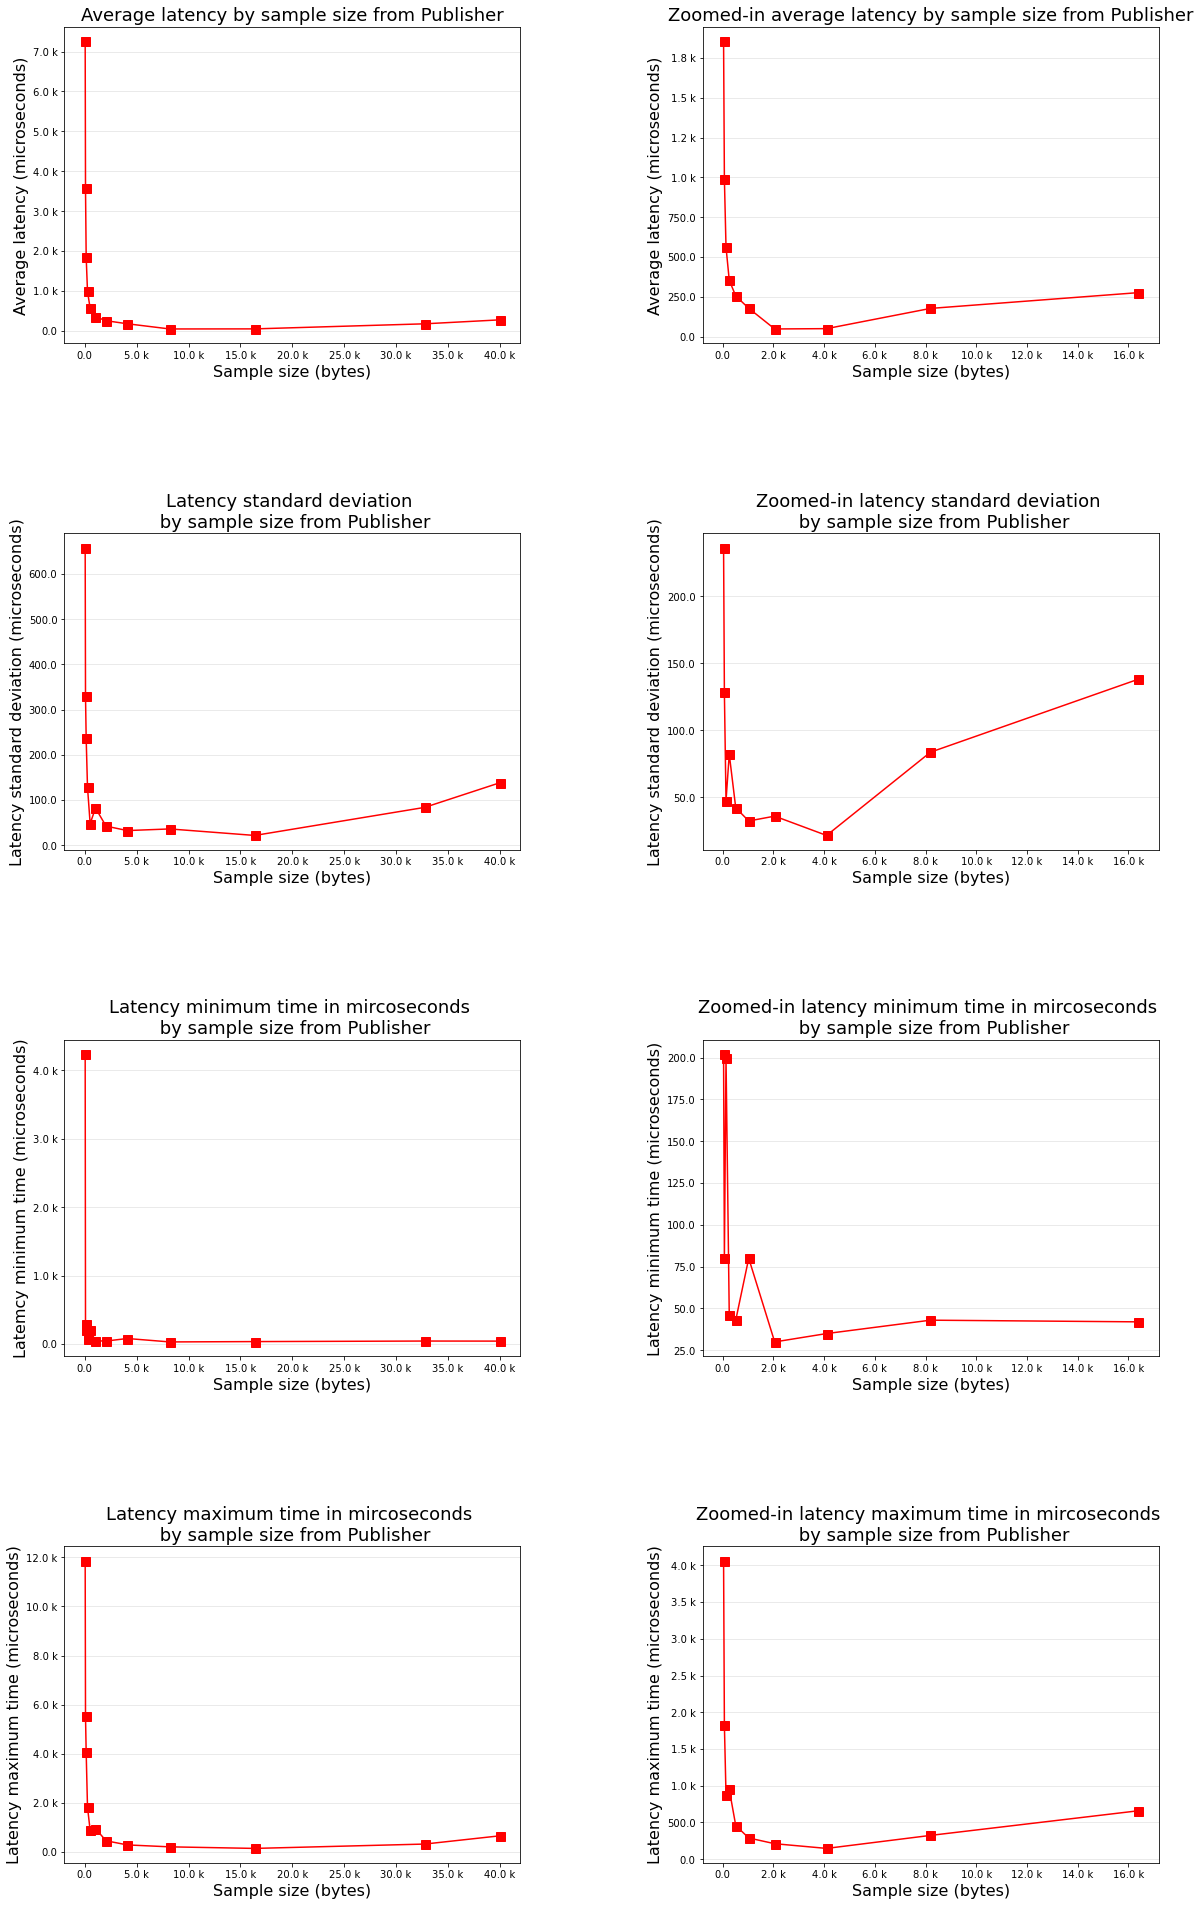

In [35]:
fix, axes = plt.subplots(4, 2, figsize = (19,15))

axes[0,0].plot(x28, y28, style, ms = mSize, color = col2)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Average latency by sample size from Publisher', fontsize = title_size)
axes[0,0].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x29, y29, style, ms = mSize, color = col2)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in average latency by sample size from Publisher', fontsize = title_size)
axes[0,1].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x30, y30, style, ms = mSize, color = col2)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,0].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x31, y31, style, ms = mSize, color = col2)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,1].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x32, y32, style, ms = mSize, color = col2)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,0].set_ylabel('Latemcy minimum time (microseconds)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x33, y33, style, ms = mSize, color = col2)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,1].set_ylabel('Latency minimum time (microseconds)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,0].plot(x34, y34, style, ms = mSize, color = col2)
axes[3,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,0].set_title('Latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,0].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,1].plot(x35, y35, style, ms = mSize, color = col2)
axes[3,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,1].set_title('Zoomed-in latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,1].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.8, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [36]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df5.head(12)

,sample_size_bytes,avg_us,std_us,min_us,max_us
id,,,,,
0,32.0,7260.0,658.4,4237.0,11862.0
1,64.0,3586.0,330.9,289.0,5538.0
2,128.0,1855.0,236.3,202.0,4064.0
3,256.0,991.0,128.3,80.0,1827.0
4,512.0,562.0,47.6,200.0,878.0
5,1024.0,354.0,82.2,46.0,950.0
6,2048.0,255.0,42.2,43.0,458.0
7,4096.0,178.0,32.4,80.0,289.0
8,8192.0,48.0,36.0,30.0,211.0


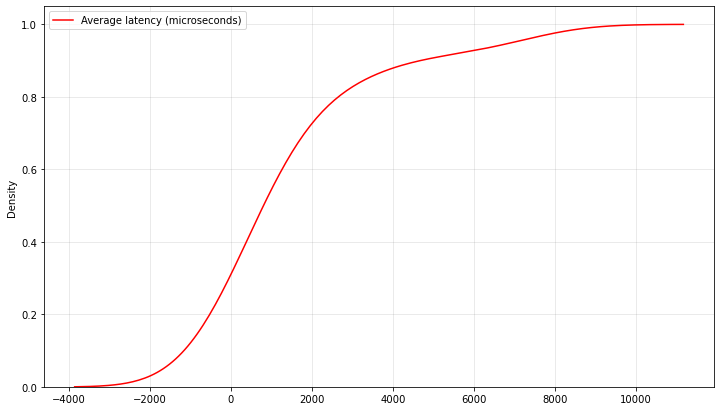

In [312]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y28, cumulative = True, label = "Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

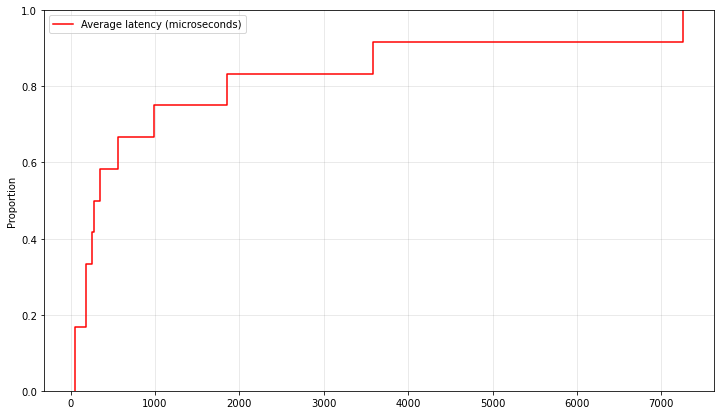

In [313]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y28, label="Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 3B: Througput (Subscriber) (Throughput Mode)

In [37]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df6 = openFile('./Tests.xlsx',
              sheet_name = '3b',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df6.columns = ['sample_size_bytes', 'total_samples', 'avg_samples_perSec', 'avg_mbps', 'lost_samples']

#SET INDEX
df6.index.name = 'id'

In [38]:
#ALL OF THE VALUES INCLUDED
x36 = df6['sample_size_bytes'].to_numpy()
y36 = df6['total_samples'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x37 = np.delete(x36,[8,9,10,11])
y37 = np.delete(y36,[0,1,2,3])

#REMOVE NaN VALUES
x37 = x37[np.isfinite(x37)]
y37 = y37[np.isfinite(y37)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [39]:
#ALL OF THE VALUES INCLUDED
x38 = df6['sample_size_bytes'].to_numpy()
y38 = df6['avg_samples_perSec'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x39 = np.delete(x38,[9,10,11])
y39 = np.delete(y38,[0,1,2])

#REMOVE NaN VALUES
x39 = x39[np.isfinite(x39)]
y39 = y39[np.isfinite(y39)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [40]:
#ALL OF THE VALUES INCLUDED
x40 = df6['sample_size_bytes'].to_numpy()
y40 = df6['avg_mbps'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x41 = np.delete(x40,[9,10,11])
y41 = np.delete(y40,[9,10,11])

#REMOVE NaN VALUES
x41 = x41[np.isfinite(x41)]
y41 = y41[np.isfinite(y41)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

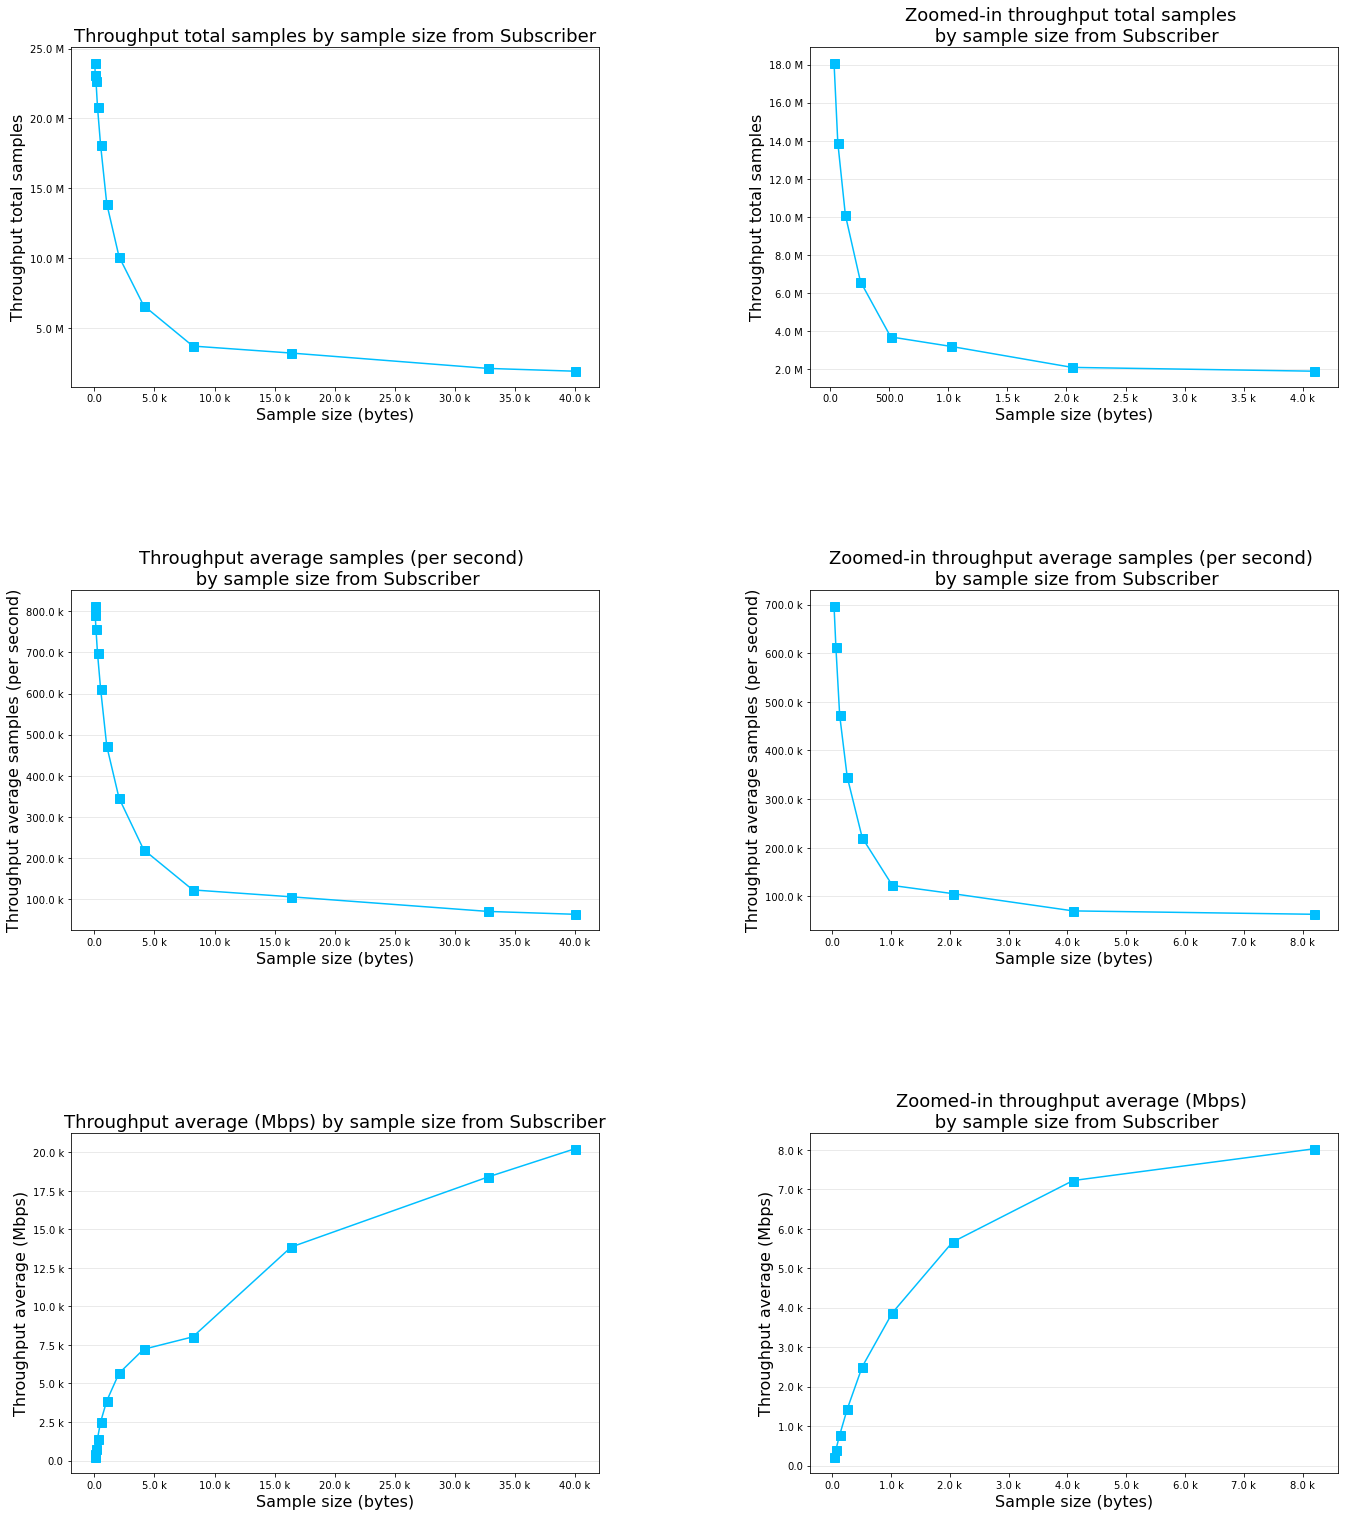

In [41]:
fix, axes = plt.subplots(3, 2, figsize = (22,11))

axes[0,0].plot(x36, y36, style, ms = mSize, color = col)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Throughput total samples by sample size from Subscriber', fontsize = title_size)
axes[0,0].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)  
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x37, y37, style, ms = mSize, color = col)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in throughput total samples \n by sample size from Subscriber', fontsize = title_size)
axes[0,1].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[1,0].plot(x38, y38, style, ms = mSize, color = col)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,0].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[1,1].plot(x39, y39, style, ms = mSize, color = col)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,1].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x40, y40, style, ms = mSize, color = col)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Throughput average (Mbps) by sample size from Subscriber', fontsize = title_size)
axes[2,0].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))


axes[2,1].plot(x41, y41, style, ms = mSize, color = col)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in throughput average (Mbps) \n by sample size from Subscriber', fontsize = title_size)
axes[2,1].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [42]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df6.head(12)

,sample_size_bytes,total_samples,avg_samples_perSec,avg_mbps,lost_samples
id,,,,,
0,32.0,24000000.0,813494.0,208.3,0.0
1,64.0,23100000.0,790604.0,404.8,0.0
2,128.0,22700000.0,756043.0,774.2,0.0
3,256.0,20800000.0,697573.0,1428.6,0.0
4,512.0,18100000.0,611855.0,2506.2,0.0
5,1024.0,13900000.0,472451.0,3870.3,0.0
6,2048.0,10100000.0,345658.0,5663.3,0.0
7,4096.0,6600000.0,220349.0,7220.4,0.0
8,8192.0,3700000.0,122449.0,8024.8,0.0


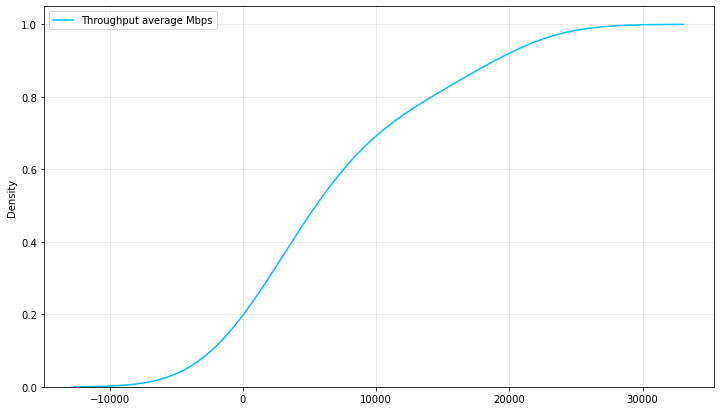

In [314]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y40, cumulative = True, label = "Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

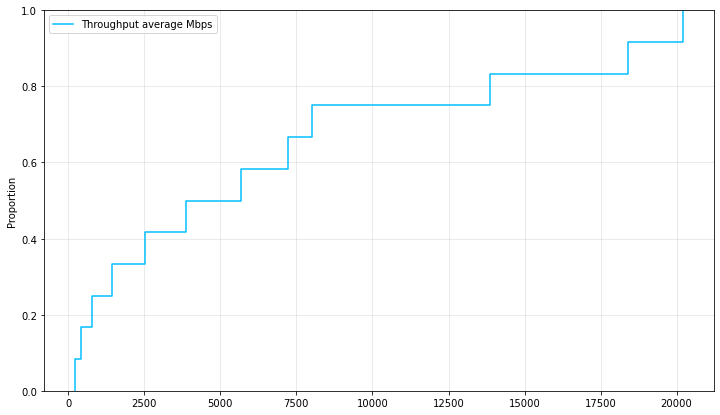

In [315]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y40, label="Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 4A: Latency (Publisher) (Latency Mode)

In [43]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df7 = openFile('./Tests.xlsx',
              sheet_name = '4a',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df7.columns = ['sample_size_bytes', 'avg_us', 'std_us', 'min_us', 'max_us']

#SET INDEX
df7.index.name = 'id'

In [44]:
#ALL OF THE VALUES INCLUDED
x42 = df7['sample_size_bytes'].to_numpy()
y42 = df7['avg_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x43 = np.delete(x42,[11])
y43 = np.delete(y42,[0])

#REMOVE NaN VALUES
x43 = x43[np.isfinite(x43)]
y43 = y43[np.isfinite(y43)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [45]:
#ALL OF THE VALUES INCLUDED
x44 = df7['sample_size_bytes'].to_numpy()
y44 = df7['std_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x45 = np.delete(x44,[11])
y45 = np.delete(y44,[0])

#REMOVE NaN VALUES
x45 = x45[np.isfinite(x45)]
y45 = y45[np.isfinite(y45)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [46]:
#ALL OF THE VALUES INCLUDED
x46 = df7['sample_size_bytes'].to_numpy()
y46 = df7['min_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x47 = np.delete(x46,[11])
y47 = np.delete(y46,[0])

#REMOVE NaN VALUES
x47 = x47[np.isfinite(x47)]
y47 = y47[np.isfinite(y47)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [47]:
#ALL OF THE VALUES INCLUDED
x48 = df7['sample_size_bytes'].to_numpy()
y48 = df7['max_us'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x49 = np.delete(x48,[11])
y49 = np.delete(y48,[0])

#REMOVE NaN VALUES
x49 = x49[np.isfinite(x49)]
y49 = y49[np.isfinite(y49)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

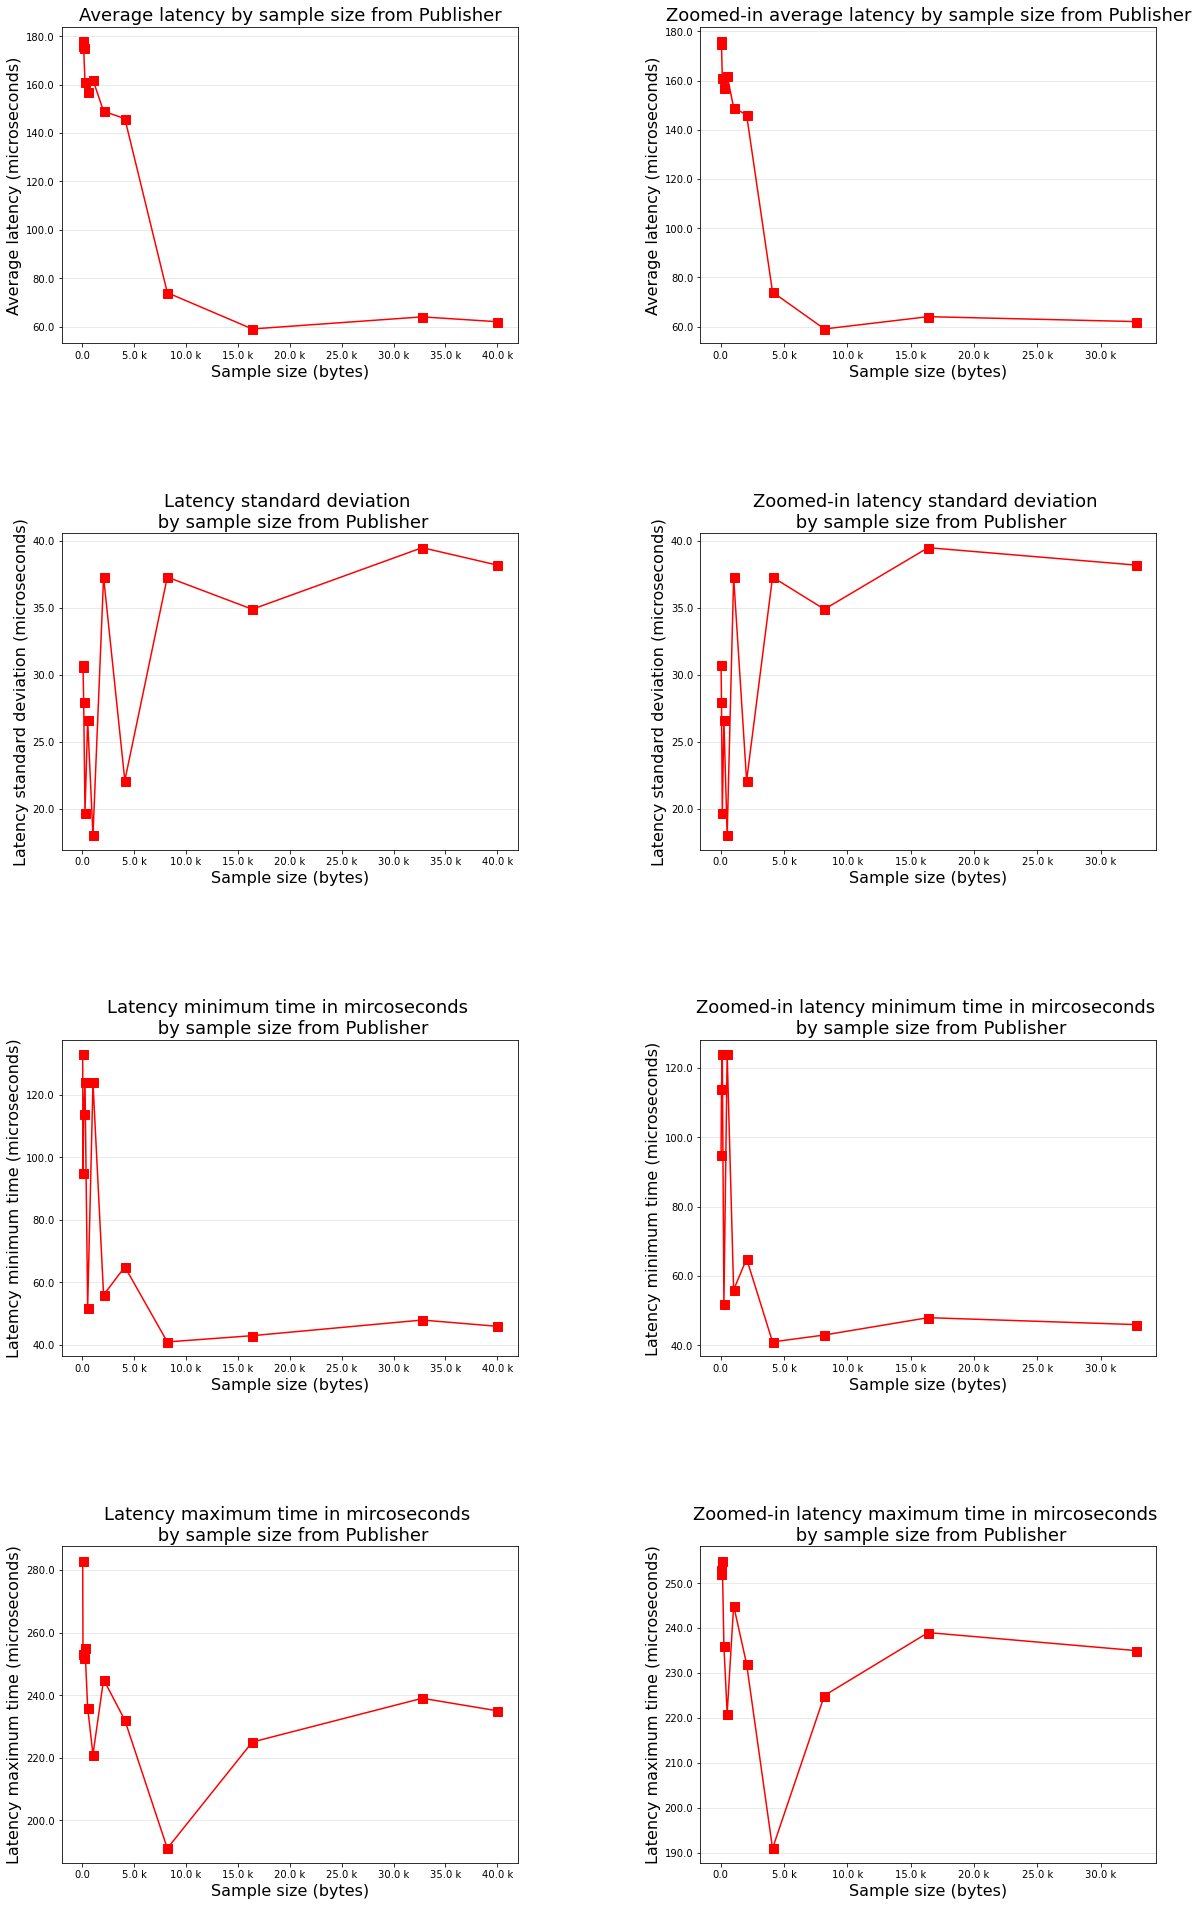

In [48]:
fix, axes = plt.subplots(4, 2, figsize = (19,15))

axes[0,0].plot(x42, y42, style, ms = mSize, color = col2)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Average latency by sample size from Publisher', fontsize = title_size)
axes[0,0].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x43, y43, style, ms = mSize, color = col2)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in average latency by sample size from Publisher', fontsize = title_size)
axes[0,1].set_ylabel('Average latency (microseconds)', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x44, y44, style, ms = mSize, color = col2)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,0].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size)  
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x45, y45, style, ms = mSize, color = col2)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in latency standard deviation \n by sample size from Publisher', fontsize = title_size)
axes[1,1].set_ylabel('Latency standard deviation (microseconds)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x46, y46, style, ms = mSize, color = col2)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,0].set_ylabel('Latemcy minimum time (microseconds)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x47, y47, style, ms = mSize, color = col2)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in latency minimum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[2,1].set_ylabel('Latency minimum time (microseconds)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,0].plot(x48, y48, style, ms = mSize, color = col2)
axes[3,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,0].set_title('Latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,0].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[3,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[3,1].plot(x49, y49, style, ms = mSize, color = col2)
axes[3,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[3,1].set_title('Zoomed-in latency maximum time in mircoseconds \n by sample size from Publisher', fontsize = title_size)
axes[3,1].set_ylabel('Latency maximum time (microseconds)', fontsize = label_size)
axes[3,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[3,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[3,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.8, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [49]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df7.head(12)

,sample_size_bytes,avg_us,std_us,min_us,max_us
id,,,,,
0,32.0,178.0,30.6,133.0,283.0
1,64.0,176.0,30.7,95.0,253.0
2,128.0,175.0,28.0,114.0,252.0
3,256.0,161.0,19.7,124.0,255.0
4,512.0,157.0,26.6,52.0,236.0
5,1024.0,162.0,18.0,124.0,221.0
6,2048.0,149.0,37.3,56.0,245.0
7,4096.0,146.0,22.1,65.0,232.0
8,8192.0,74.0,37.3,41.0,191.0


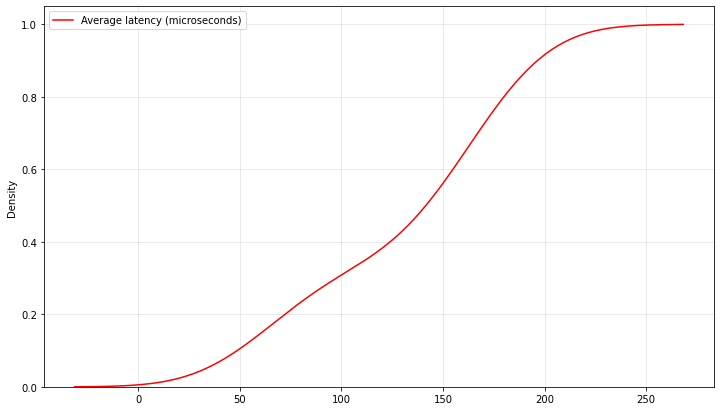

In [299]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y42, cumulative = True, label = "Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

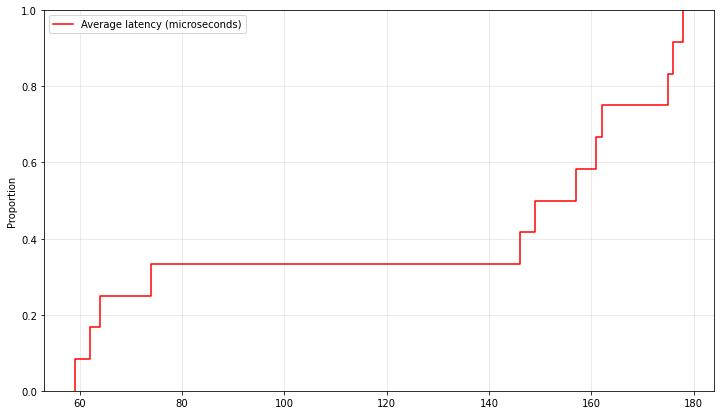

In [302]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y42, label="Average latency (microseconds)", color=col2)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

## Measurements from Test 4B: Throughput (Subscriber) (Latency Mode)

In [50]:
#READING CORRECT NON-EMPTY COLUMNS & ROWS
df8 = openFile('./Tests.xlsx',
              sheet_name = '4b',
              header = 0,
              names = default,
              index_col = default,
              usecols='B, B:F',
              squeeze = False,
              dtype = default,
              engine = default,
              converters = default,
              true_values = default,
              false_values = default,
              skiprows = 3, #Changes zoom into the value, disregarding large values that minimize smaller ones
              nrows = default)

#RENAME HEADERS
df8.columns = ['sample_size_bytes', 'total_samples', 'avg_samples_perSec', 'avg_mbps', 'lost_samples']

#SET INDEX
df8.index.name = 'id'

In [51]:
#ALL OF THE VALUES INCLUDED
x50 = df8['sample_size_bytes'].to_numpy()
y50 = df8['total_samples'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x51 = np.delete(x50,[11])
y51 = np.delete(y50,[0])

#REMOVE NaN VALUES
x51 = x51[np.isfinite(x51)]
y51 = y51[np.isfinite(y51)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [52]:
#ALL OF THE VALUES INCLUDED
x52 = df8['sample_size_bytes'].to_numpy()
y52 = df8['avg_samples_perSec'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x53 = np.delete(x52,[10,11])
y53 = np.delete(y52,[0,1])

#REMOVE NaN VALUES
x53 = x53[np.isfinite(x53)]
y53 = y53[np.isfinite(y53)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

In [53]:
#ALL OF THE VALUES INCLUDED
x54 = df8['sample_size_bytes'].to_numpy()
y54 = df8['avg_mbps'].to_numpy()

#REMOVE VALUES TO "ZOOM" INTO VALUES EXCLUDING THE LARGEST/SMALLEST 
x55 = np.delete(x54,[10,11])
y55 = np.delete(y54,[10,11])

#REMOVE NaN VALUES
x55 = x55[np.isfinite(x55)]
y55 = y55[np.isfinite(y55)]

#REMOVE NUMBER "+E" NOTATION
np.set_printoptions(suppress=True)

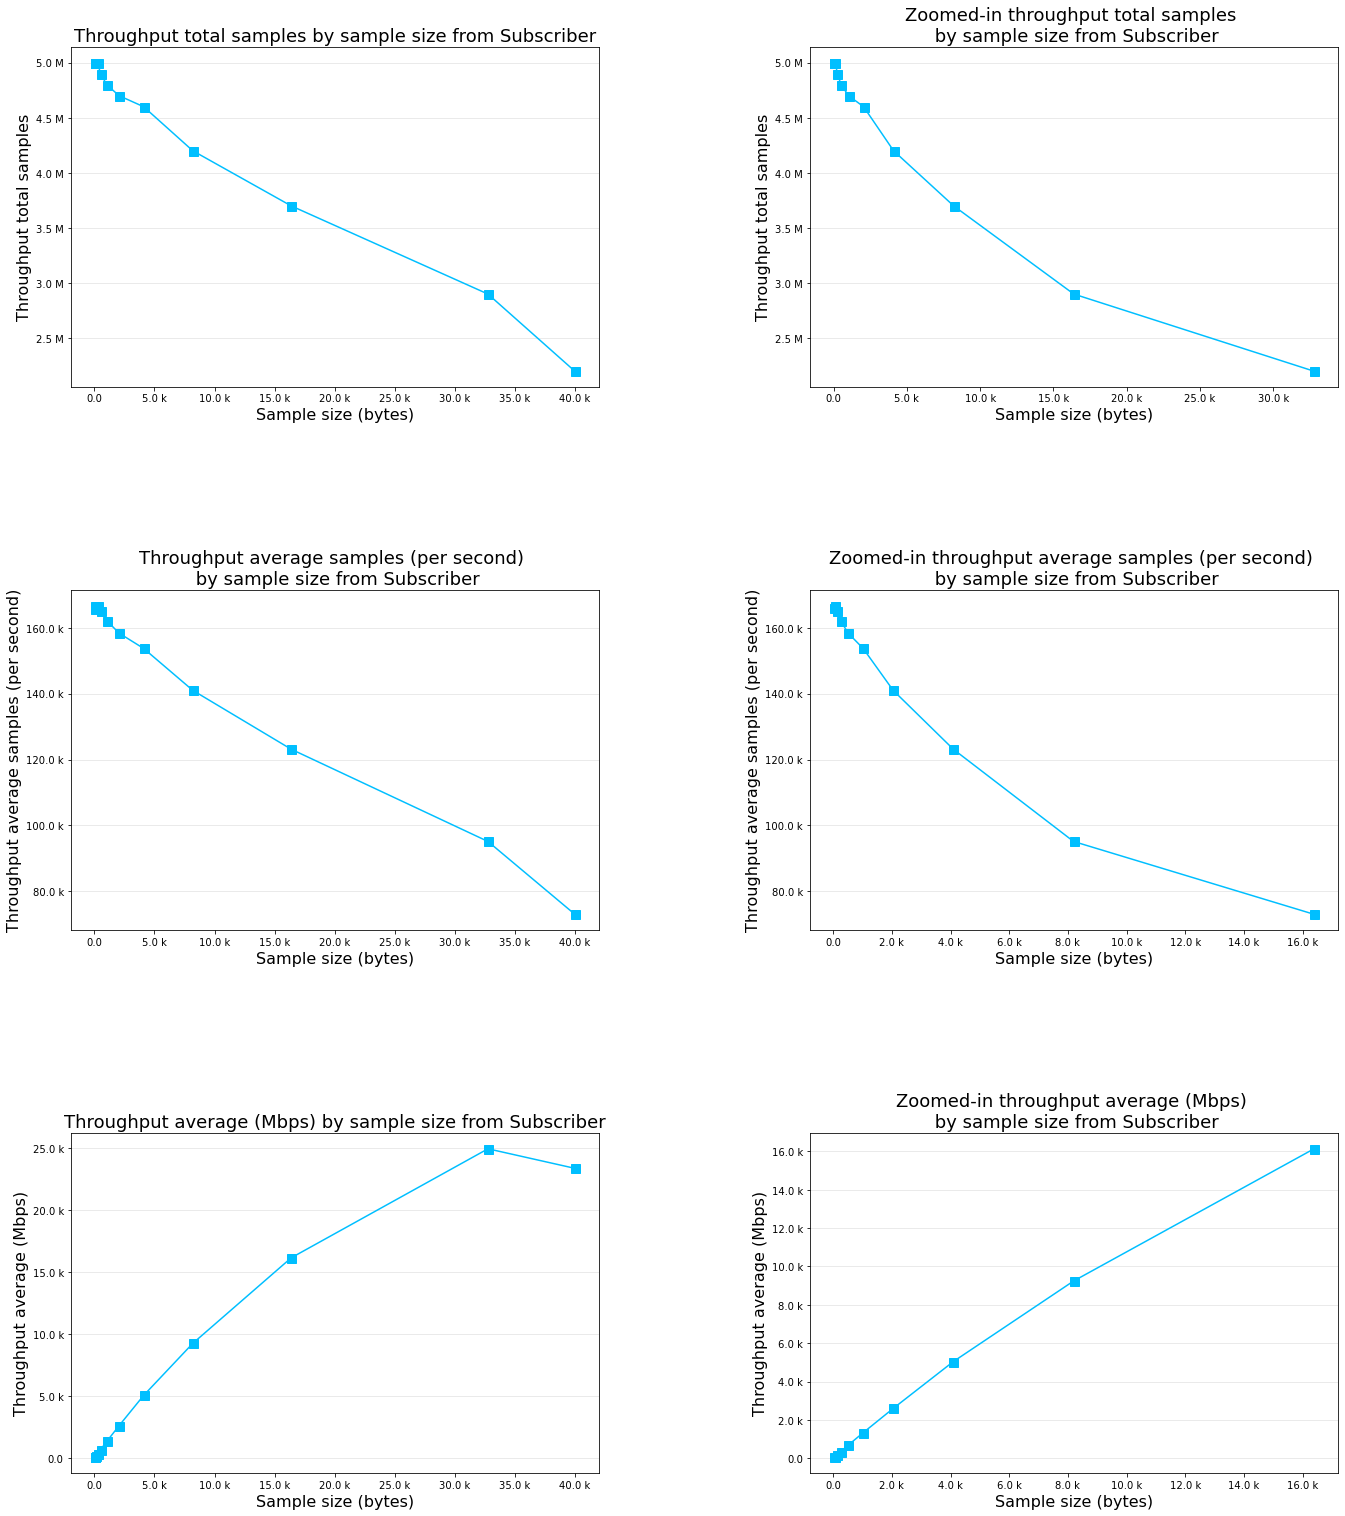

In [54]:
fix, axes = plt.subplots(3, 2, figsize = (22,11))

axes[0,0].plot(x50, y50, style, ms = mSize, color = col)
axes[0,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,0].set_title('Throughput total samples by sample size from Subscriber', fontsize = title_size)
axes[0,0].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,0].set_xlabel('Sample size (bytes)', fontsize = label_size)   
axes[0,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[0,1].plot(x51, y51, style, ms = mSize, color = col)
axes[0,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[0,1].set_title('Zoomed-in throughput total samples \n by sample size from Subscriber', fontsize = title_size)
axes[0,1].set_ylabel('Throughput total samples', fontsize = label_size)
axes[0,1].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[0,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[0,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,0].plot(x52, y52, style, ms = mSize, color = col)
axes[1,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,0].set_title('Throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,0].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,0].set_xlabel('Sample size (bytes)', fontsize = label_size) 
axes[1,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[1,1].plot(x53, y53, style, ms = mSize, color = col)
axes[1,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[1,1].set_title('Zoomed-in throughput average samples (per second) \n by sample size from Subscriber', fontsize = title_size)
axes[1,1].set_ylabel('Throughput average samples (per second)', fontsize = label_size)
axes[1,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[1,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[1,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,0].plot(x54, y54, style, ms = mSize, color = col)
axes[2,0].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,0].set_title('Throughput average (Mbps) by sample size from Subscriber', fontsize = title_size)
axes[2,0].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,0].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,0].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,0].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

axes[2,1].plot(x55, y55, style, ms = mSize, color = col)
axes[2,1].yaxis.grid(True, color ="grey", alpha=0.2)
axes[2,1].set_title('Zoomed-in throughput average (Mbps) \n by sample size from Subscriber', fontsize = title_size)
axes[2,1].set_ylabel('Throughput average (Mbps)', fontsize = label_size)
axes[2,1].set_xlabel('Sample size (bytes)', fontsize = label_size)
axes[2,1].yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))
axes[2,1].xaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1))

# plt.ticklabel_format(useOffset = False)
#ADJUSTING THE SPACING BETWEEN SUBPLOTS
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [55]:
#SHOW TABULAR DATA
#DISPLAY DATA OF INTEREST
df8.head(12)

,sample_size_bytes,total_samples,avg_samples_perSec,avg_mbps,lost_samples
id,,,,,
0,32.0,5000000.0,165612.0,42.4,0.0
1,64.0,5000000.0,166512.0,85.3,0.0
2,128.0,5000000.0,165886.0,169.9,0.0
3,256.0,5000000.0,166726.0,341.5,0.0
4,512.0,4900000.0,165118.0,676.3,0.0
5,1024.0,4800000.0,162208.0,1328.8,0.0
6,2048.0,4700000.0,158401.0,2595.2,0.0
7,4096.0,4600000.0,153751.0,5038.1,0.0
8,8192.0,4200000.0,141003.0,9240.8,0.0


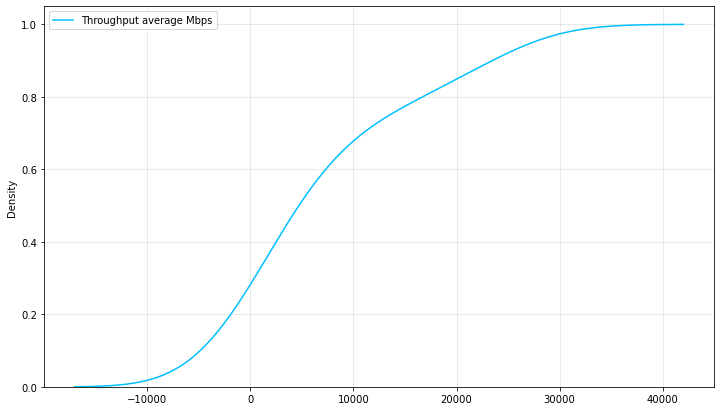

In [316]:
#SMOOTH ESTIMATE OF CDF
fig = plt.figure(figsize=(12, 7))
sns.kdeplot(data = y54, cumulative = True, label = "Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

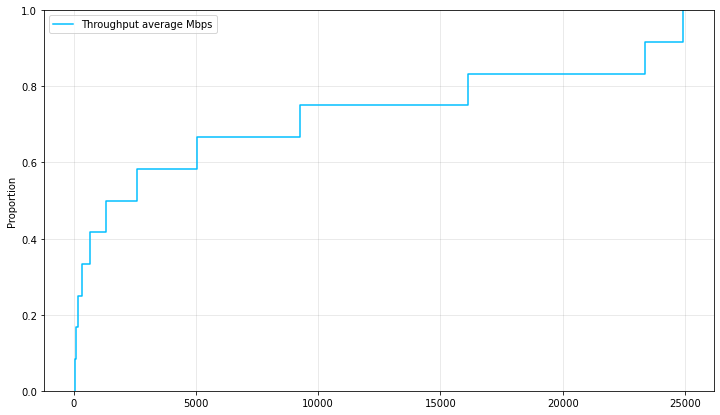

In [317]:
#CUMULTAIVE DISTRIBUTED FUNCTION (CFD)
fig = plt.figure(figsize=(12, 7))
sns.ecdfplot(data = y54, label="Throughput average Mbps", color=col)
plt.grid(True, color ="grey", alpha=0.2)
plt.legend()
plt.show()

# Conclusion about the work done

We have sucessfuly managed to use the data collected from the research in order to produce numerous graphical

visualisation of the latency and throughput. Both of the metrics were presented in all aspects of data, such

as averages, standard deviation, maximum, minimum and CDF. We can derive numerous observations from the clearned and 

transformed data and interpret them accordingly to what stands out in our opinion. In order to view more detailed 

conclusions and observation we encourage to view the report "Results" section for all the details as well as the 

earlier informed "Methods" chapter. 
